<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('/Users/swllms/DAT-10-14-SW/projects/required/project-eda-options/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer: could have also used nsmallest and nlargest
movies['duration'].nsmallest(1)


389    64
Name: duration, dtype: int64

In [8]:
movies['duration'].nlargest(1)

476    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

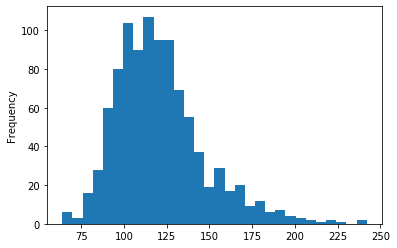

In [11]:
# Answer:
movies['duration'].plot(kind='Hist', bins=30)

#### Use a box plot to display that same data.

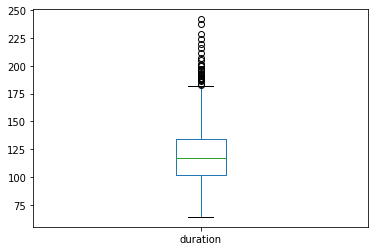

In [12]:
# Answer:
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Count')

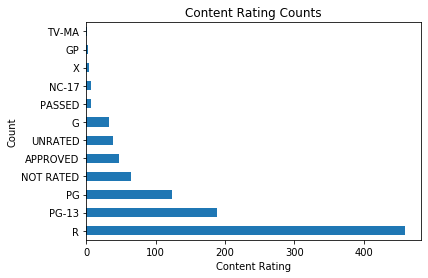

In [14]:
# Answer:
movies.content_rating.value_counts().plot(kind='barh', title='Content Rating Counts')
plt.xlabel('Content Rating')
plt.ylabel('Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer: Condition and result logic
movies['content_rating'] = movies['content_rating'].replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'})

In [16]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer: Condition and result logic
movies['content_rating'] = movies['content_rating'].replace({'X':'NC-17', 'TV-MA':'NC-17'})

In [18]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer: 3 missing values; 
movies.content_rating.fillna(value='UNRATED', inplace=True)

In [21]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [22]:
# Answer:
movies[movies['duration'] >=120]['star_rating'].mean() 

7.948898678414082

In [23]:
movies[movies['duration'] <120]['star_rating'].mean() 

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

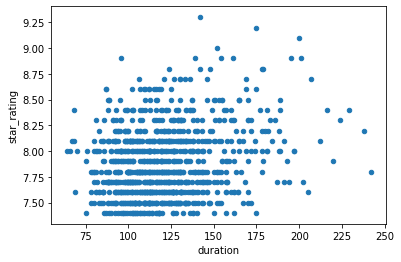

In [24]:
# Answer:
movies.plot('duration', 'star_rating', kind='scatter');

#### Calculate the average duration for each genre.

In [25]:
# Answer: Use groupby for genre and duration and take the mean
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

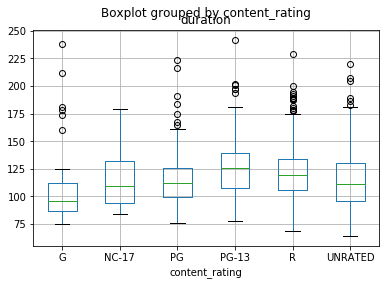

In [26]:
# Answer:
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [27]:
# Answer:
movies.groupby('genre')['title', 'star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Life Is Beautiful,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [28]:
# Answer: same title but different actors and movie durations. 
movies.duplicated(['title']).sum()

4

In [29]:
dups = movies[movies.title.duplicated()].title
dups

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

In [30]:
movies[movies.title.isin(dups)]#different duration and different actor list. 

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [9]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [31]:
# Answer:
rel_genres = movies['genre'].value_counts()
rel_genres

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [32]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [38]:
# Answer:
grs = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
grs[grs['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [45]:
movies.actors_list.value_counts() ##Order counts and may not count movies with the same cast
###Harry Potter Cast had 6 Movies together, followed by Star Wars, Back to the Future and Toy Stroy

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                         6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                           3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']                     2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                                   2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                      2
[u'Robert Downey Jr.', u'Jude Law', u'Rachel McAdams']                         1
[u'Heather Langenkamp', u'Johnny Depp', u'Robert Englund']                     1
[u'Matthew McConaughey', u'Tye Sheridan', u'Jacob Lofland']                    1
[u'Ryan Potter', u'Scott Adsit', u'Jamie Chung']                               1
[u'Daniel Day-Lewis', u'Madeleine Stowe', u'Russell Means']                    1
[u'Gregory Peck', u'Lee Remick', u'Harvey Stephens']                           1
[u'Shah Rukh Khan', u'Kajol', u'Amrish Puri']                                  1
[u'Will Ferrell', u'Emma Tho

In [55]:
hanks = movies.actors_list.str.contains("Tom Hanks")

In [58]:
hanks.value_counts() ###Tom Hanks has been in 14 of the 1000 movies listed

False    965
True      14
Name: actors_list, dtype: int64

In [61]:
DH = movies.actors_list.str.contains("Patrick Stewart")

In [62]:
DH.value_counts()

False    975
True       4
Name: actors_list, dtype: int64